The haar wavelet with SALT. It is less exciting because the haar wavelet is easier to fit see (https://en.wikipedia.org/wiki/Fast_wavelet_transform we don't understand 100% but we think it is similar to the SALT approach) 

[[-0.04135805936426358], [0.15062371459370338, -0.062091891702211154]]


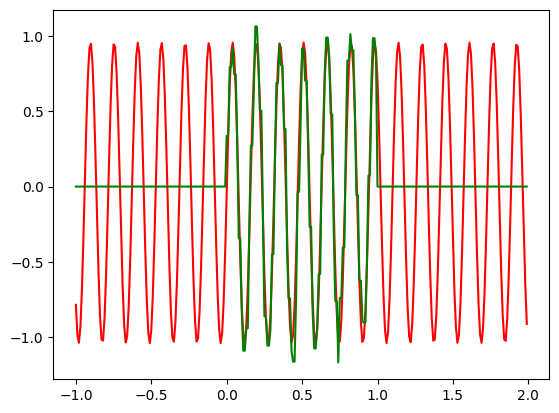

In [196]:
import numpy as np
from random import random
import matplotlib.pyplot as plt
from math import pow,sin,cos

def f(t,k=40):
    return sin(k*t)+(-1+cos(k))/k #integral of this has to be 0 should have added a constant first coef.

def mother_haar_wavelet(t):
    return 1 if 0<=t<0.5 else (-1 if 0.5<=t<1 else 0)
    
def haar(n,k,t):
    return pow(2,n/2)*mother_haar_wavelet(2**n*t-k)

def scale_down(n,k,t):
    return (t+k)/2**n

def eval(coef,t):
    return sum(sum(coef[n][k]*haar(n,k,t) for k in range(2**n)) for n in range(len(coef)))


#reuse of evaluations of f on each scale still needs to be done

def COEF(coef,nsim):
    coef_new = [[0]*2**n for n in range(len(coef))]
    for _ in range(nsim):
        for n in range(len(coef)):
            for k in range(2**n):
                u = scale_down(n,k,random())
                coef_new[n][k]+= ((f(u)-eval(coef,u))*haar(n,k,u)/2**n + coef[n][k])/nsim
            
    return coef_new
                
order = 6 # =n careful 2**n everywhere
coef = []

while len(coef)<order:
    coef.append([0]*2**(len(coef)+1))
    coef.append([0]*2**(len(coef)+1))
    coef = COEF(coef,10**2)

print(coef[0:2])
    
xs = np.arange(-1,2,0.01)
ys = [f(x) for x in xs]
zs = [eval(coef,x) for x in xs]

plt.plot(xs,ys, color ="red")
plt.plot(xs,zs, color ="green")
plt.show()


IDEA:
variable orthonomal basis (need convex type condition for optimization stuff)
with the Haar basis you get something like a Tree we think


[[-0.29436132177845475], [-0.10350765737931313, -0.0862619164380344]]


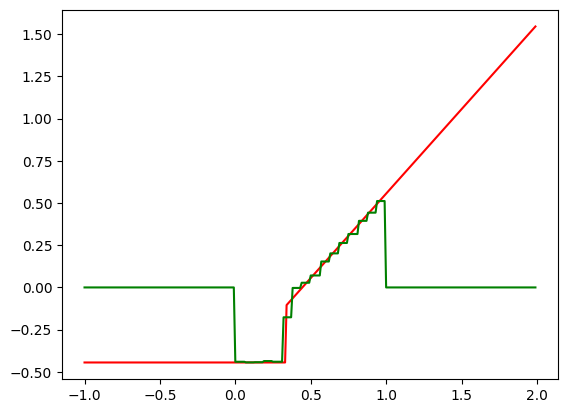

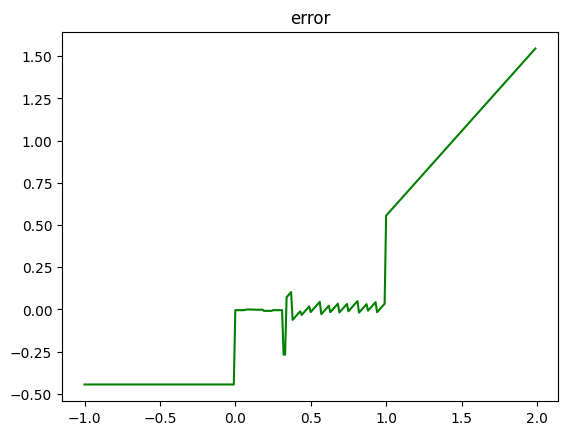

In [213]:
import numpy as np
from random import random
import matplotlib.pyplot as plt
from math import pow,sin,cos

def f(t,k = 1/3):
    tmp =  0 if t<k else t
    return tmp - (0.5 - k**2/2) 
#integral of this has to be 0 should have added a constant first coef.
def mother_haar_wavelet(t):
    return 1 if 0<=t<0.5 else (-1 if 0.5<=t<1 else 0)
    
def haar(n,k,t):
    return pow(2,n/2)*mother_haar_wavelet(2**n*t-k)

def scale_down(n,k,t):
    return (t+k)/2**n

def eval(coef,t):
    return sum(sum(coef[n][k]*haar(n,k,t) for k in range(2**n)) for n in range(len(coef)))


#reuse of evaluations of f on each scale still needs to be done

def COEF(coef,nsim):
    coef_new = [[0]*2**n for n in range(len(coef))]
    for _ in range(nsim):
        for n in range(len(coef)):
            for k in range(2**n):
                u = scale_down(n,k,random())
                coef_new[n][k]+= ((f(u)-eval(coef,u))*haar(n,k,u)/2**n + coef[n][k])/nsim
            
    return coef_new
                
order = 4 # =n careful 2**n everywhere
coef = []

while len(coef)<order:
    coef.append([0]*2**(len(coef)+1))
    coef.append([0]*2**(len(coef)+1))
    coef = COEF(coef,2*10**2)

print(coef[0:2])
    
xs = np.arange(-1,2,0.01)
ys = [f(x) for x in xs]
zs = [eval(coef,x) for x in xs]

plt.plot(xs,ys, color ="red")
plt.plot(xs,zs, color ="green")
plt.show()

xs = np.arange(-1,2,0.01)
zs = [f(x) - eval(coef,x) for x in xs]
plt.plot(xs,zs, color ="green")
plt.title("error")
plt.show()

[0.8511056946103529, [0.1719667211124653], [0.27123783367817483, -0.08945748529474185]]


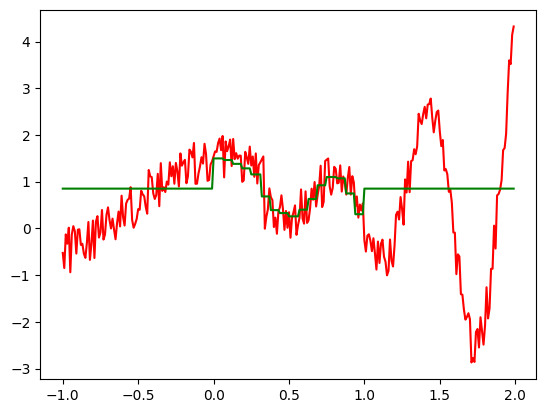

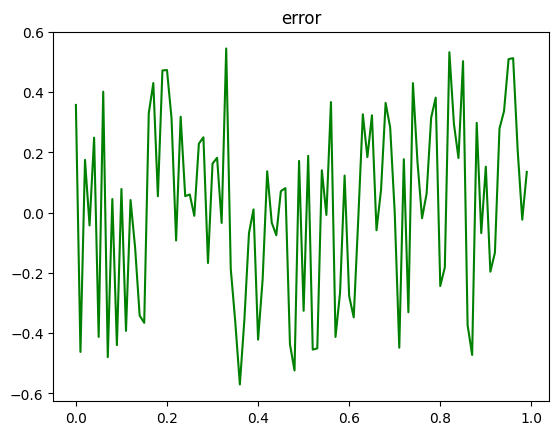

In [114]:
import numpy as np
from random import random
import matplotlib.pyplot as plt
from math import pow,sin,cos

def f(t,k = 1/3):
    return (cos(3*t) if t<k else t**2*sin(10*t)) + random()

def mother_wavelet(t):
    return 1 if 0<=t<0.5 else (-1 if 0.5<=t<1 else 0)
    
def wavelet(n,k,t):
    return pow(2,n/2)*mother_wavelet(2**n*t-k)

def scale_down(n,k,t):
    return (t+k)/2**n

def eval(coef,t):
    return sum(sum(coef[n+1][k]*wavelet(n,k,t) for k in range(2**n)) for n in range(len(coef)-1)) + coef[0]


#reuse of evaluations of f on each scale still needs to be done

def COEF(coef,nsim):
    coef_new = [0]+[[0]*2**n for n in range(len(coef)-1)]
    for _ in range(nsim):
        coef_new[0] += ((f(random())-eval(coef,random())) + coef[0])/nsim
        for n in range(len(coef)-1):
            for k in range(2**n):
                u = scale_down(n,k,random())
                coef_new[n+1][k]+= ((f(u)-eval(coef,u))*wavelet(n,k,u)/2**n + coef[n+1][k])/nsim
            
    return coef_new
                
order = 4 # =n careful 2**n everywhere
coef = [0]

while len(coef)<order+1:
    coef.append([0]*2**(len(coef)))
    coef.append([0]*2**(len(coef)))
    coef = COEF(coef,8*10**2)

print(coef[0:3])
    
xs = np.arange(-1,2,0.01)
ys = [f(x) for x in xs]
zs = [eval(coef,x) for x in xs]

plt.plot(xs,ys, color ="red")
plt.plot(xs,zs, color ="green")
plt.show()

xs = np.arange(0,1,0.01)
zs = [f(x) - eval(coef,x) for x in xs]
plt.plot(xs,zs, color ="green")
plt.title("error")
plt.show()

plt.hist(zs)
plt.show()